# APM: Figures for CCN Paper

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

from fooof import FOOOF

from neurodsp.sim import sim_combined
from fooof.sim import gen_power_spectrum

from neurodsp.utils import create_times
from neurodsp.spectral import compute_spectrum

from neurodsp.plts import plot_time_series, plot_power_spectra

## Create simulated time series

In [2]:
n_seconds = 5
fs = 500

sims = {
    'sim_powerlaw' : {'exponent' : -1.5},
    'sim_bursty_oscillation' : {'freq' : 10},
}

In [3]:
times = create_times(n_seconds, fs)
sig = sim_combined(n_seconds, fs, sims)#, [0.6, 0.4])

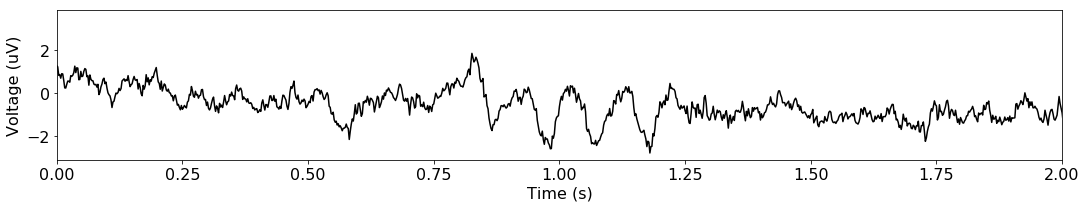

In [4]:
plot_time_series(times, sig)
plt.xlim([0, 2])
plt.savefig('plts/1A-TimeSeries.png', dpi=300)

### Power Spectrum of Simulated Time Series

In [5]:
sig_fs, sig_ps = compute_spectrum(sig, fs, nperseg=250)

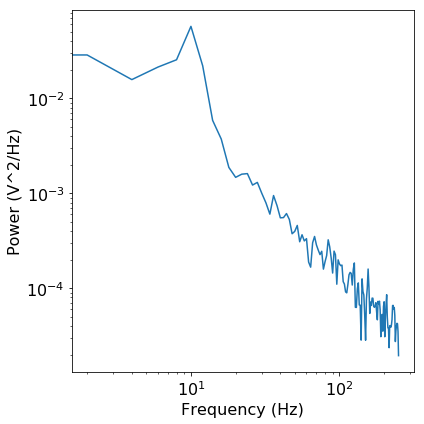

In [6]:
plot_power_spectra(sig_fs, sig_ps)
plt.savefig('plts/1B-TimePSD.png', dpi=300)

### Create simulated power spectrum

In [7]:
freqs, powers = gen_power_spectrum([3, 40], [1, 1], [10, 0.3, 1], nlv=0.025)

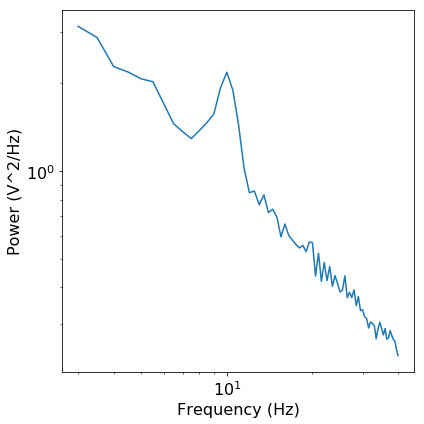

In [8]:
plot_power_spectra(freqs, powers)
plt.savefig('plts/1C-SimPSD.png', dpi=300)

### FOOOF Demo

In [9]:
fm = FOOOF(peak_width_limits=[1, 8], min_peak_height=0.1, verbose=False)

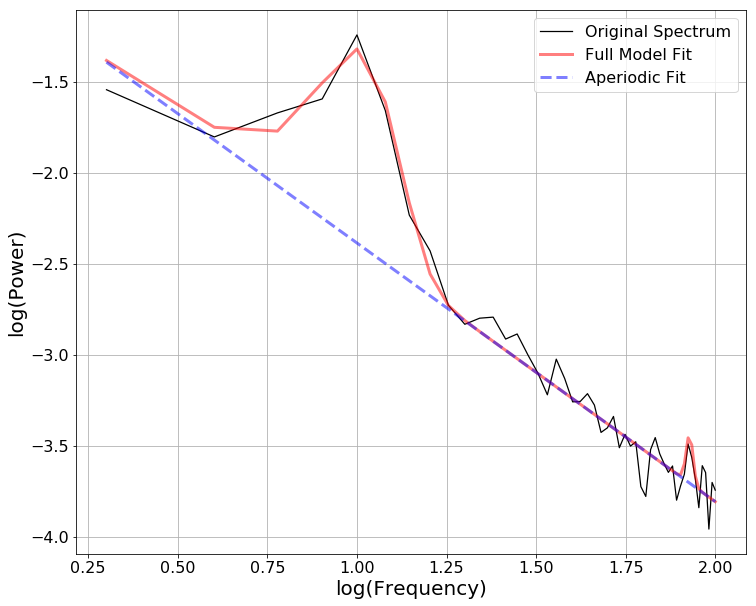

In [10]:
fm.fit(sig_fs, sig_ps, [1, 100])
fm.plot(plt_log=True)
plt.ylabel('log(Power)');
plt.savefig('plts/2-FOOOFFit.png', dpi=300)